In [ ]:
# Import 3rd party dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

!pip install imblearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
from imblearn.over_sampling import SMOTE
from torch.autograd.functional import hessian
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    confusion_matrix,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import warnings
from IPython.display import display, HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from google.colab import files
import pickle

In [ ]:
# Suppressing Warnings and Adjusting Display Width
# We ignore any warning messages that might arise during execution to maintain clean output.
# Additionally, we adjust the display width to ensure that the content is fully visible within the Jupyter notebook.

warnings.filterwarnings("ignore")
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load the data, exploratory data analysis, and data splitting

In [ ]:
# Load the data
!wget -O "full_data.csv" "https://drive.google.com/uc?export=download&id=108x-b47ZkZ3Fpvyr5-kCsApqjnYl1u_D"
dataset_df = pd.read_csv("full_data.csv")

--2024-08-22 17:51:57--  https://drive.google.com/uc?export=download&id=108x-b47ZkZ3Fpvyr5-kCsApqjnYl1u_D
Resolving drive.google.com (drive.google.com)... 142.250.125.100, 142.250.125.139, 142.250.125.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.125.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=108x-b47ZkZ3Fpvyr5-kCsApqjnYl1u_D&export=download [following]
--2024-08-22 17:51:57--  https://drive.usercontent.google.com/download?id=108x-b47ZkZ3Fpvyr5-kCsApqjnYl1u_D&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.152.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290771 (284K) [application/octet-stream]
Saving to: ‘full_data.csv’

full_data.csv       100%[===================>] 283.96K  --.-

In [ ]:
# Print the data table
dataset_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
# Presprocess the data

pd.options.mode.chained_assignment = None

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
dataset_df["work_type"]=label_encoder.fit_transform(dataset_df["work_type"])
dataset_df["Residence_type"]=label_encoder.fit_transform(dataset_df["Residence_type"])
dataset_df["smoking_status"]=label_encoder.fit_transform(dataset_df["smoking_status"])
dataset_df["smoking_status"].unique()

array([1, 2, 3, 0])

In [ ]:
dataset_df=dataset_df.iloc[:,[1,2,3,5,6,7,8,9,10]]

In [ ]:
dataset_df

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,1,228.69,36.6,1,1
1,80.0,0,1,1,0,105.92,32.5,2,1
2,49.0,0,0,1,1,171.23,34.4,3,1
3,79.0,1,0,2,0,174.12,24.0,2,1
4,81.0,0,0,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,1,0,70.15,29.8,1,0
4977,40.0,0,0,1,1,191.15,31.1,3,0
4978,45.0,1,0,0,0,95.02,31.8,3,0
4979,40.0,0,0,1,0,83.94,30.0,3,0


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4981 non-null   float64
 1   hypertension       4981 non-null   int64  
 2   heart_disease      4981 non-null   int64  
 3   work_type          4981 non-null   int64  
 4   Residence_type     4981 non-null   int64  
 5   avg_glucose_level  4981 non-null   float64
 6   bmi                4981 non-null   float64
 7   smoking_status     4981 non-null   int64  
 8   stroke             4981 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 350.4 KB


In [ ]:
dataset_df.describe()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,22.662755,0.294848,0.228412,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,61.000000,0.000000,0.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,82.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [ ]:
x=dataset_df.iloc[:,:-1].values
y=dataset_df.iloc[:,-1].values

In [ ]:
# Data standardization

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled

array([[ 1.04058433e+00, -3.26185770e-01,  4.13675323e+00, ...,
         2.72341090e+00,  1.19323816e+00, -3.53933192e-01],
       [ 1.61427033e+00, -3.26185770e-01,  4.13675323e+00, ...,
        -5.22766599e-04,  5.89389611e-01,  5.78839946e-01],
       [ 2.46249882e-01, -3.26185770e-01, -2.41735473e-01, ...,
         1.44852918e+00,  8.69221866e-01,  1.51161308e+00],
       ...,
       [ 6.97311148e-02,  3.06573766e+00, -2.41735473e-01, ...,
        -2.42364234e-01,  4.86293516e-01,  1.51161308e+00],
       [-1.50917344e-01, -3.26185770e-01, -2.41735473e-01, ...,
        -4.88199415e-01,  2.21189274e-01,  1.51161308e+00],
       [ 1.61427033e+00,  3.06573766e+00, -2.41735473e-01, ...,
        -4.92415000e-01,  8.86371531e-02,  5.78839946e-01]])

In [ ]:
dataset_df = pd.DataFrame(x_scaled, columns=dataset_df.columns[:8])
dataset_df = dataset_df.assign(target = y)

In [ ]:
dataset_df

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,target
0,1.040584,-0.326186,4.136753,-0.351534,0.983473,2.723411,1.193238,-0.353933,1
1,1.614270,-0.326186,4.136753,-0.351534,-1.016804,-0.000523,0.589390,0.578840,1
2,0.246250,-0.326186,-0.241735,-0.351534,0.983473,1.448529,0.869222,1.511613,1
3,1.570141,3.065738,-0.241735,0.811143,-1.016804,1.512650,-0.662492,0.578840,1
4,1.658400,-0.326186,-0.241735,-0.351534,0.983473,1.780895,0.073909,-0.353933,1
...,...,...,...,...,...,...,...,...,...
4976,-0.106788,-0.326186,-0.241735,-0.351534,-1.016804,-0.794162,0.191733,-0.353933,0
4977,-0.150917,-0.326186,-0.241735,-0.351534,0.983473,1.890500,0.383197,1.511613,0
4978,0.069731,3.065738,-0.241735,-1.514212,-1.016804,-0.242364,0.486294,1.511613,0
4979,-0.150917,-0.326186,-0.241735,-0.351534,-1.016804,-0.488199,0.221189,1.511613,0


In [ ]:
predictor_columns = [col for col in dataset_df.columns if col != "target"]

# Count the number of predictor columns
num_predictor_columns = len(predictor_columns)

In [ ]:
# Normalize each predictor attribute using z-score
for predictor in predictor_columns:
    dataset_df[predictor] = (dataset_df[predictor] - dataset_df[predictor].mean()) / dataset_df[predictor].std()

In [ ]:
# Generate descriptive statistics for the dataset

dataset_df.describe()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,target
count,4981.000000,4.981000e+03,4.981000e+03,4.981000e+03,4.981000e+03,4.981000e+03,4.981000e+03,4.981000e+03,4981.000000
mean,0.000000,7.132531e-18,-6.276627e-17,-4.279519e-18,6.704579e-17,8.559037e-18,1.426506e-17,-4.279519e-17,0.049789
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.217531
min,-1.912383,-3.261530e-01,-2.417112e-01,-1.514060e+00,-1.016702e+00,-1.127524e+00,-2.135079e+00,-1.286577e+00,0.000000
25%,-0.812781,-3.261530e-01,-2.417112e-01,-3.514991e-01,-1.016702e+00,-6.370122e-01,-7.066046e-01,-1.286577e+00,0.000000
50%,0.069724,-3.261530e-01,-2.417112e-01,-3.514991e-01,9.833745e-01,-3.126666e-01,-5.863709e-02,5.787818e-01,0.000000
75%,0.775728,-3.261530e-01,-2.417112e-01,8.110620e-01,9.833745e-01,1.756267e-01,6.040570e-01,5.787818e-01,0.000000
max,1.702359,3.065430e+00,4.136338e+00,1.973623e+00,9.833745e-01,3.678204e+00,3.004482e+00,1.511461e+00,1.000000


In [ ]:
# Split dataset into training and test sets
train_df, test_df = train_test_split(dataset_df, test_size=0.1, random_state=42)

# Separate target variable from features
y_train = train_df["target"]
X_train = train_df.drop("target", axis=1)
y_test = test_df["target"]
X_test = test_df.drop("target", axis=1)

In [ ]:
y_train

,target
2940,0
586,0
1551,0
2763,0
2655,0
...,...
4426,0
466,0
3092,0
3772,0


In [ ]:
X_train

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2940,0.555102,-0.326153,-0.241711,-0.351499,0.983375,-0.599298,0.383159,-1.286577
586,0.952229,-0.326153,-0.241711,-1.514060,-1.016702,0.131035,-0.264809,0.578782
1551,0.290350,-0.326153,-0.241711,0.811062,0.983375,-0.444224,1.296204,1.511461
2763,-0.062652,-0.326153,-0.241711,-0.351499,-1.016702,0.041851,1.001673,1.511461
2655,0.643353,-0.326153,-0.241711,-1.514060,-1.016702,-0.722868,1.193118,-0.353898
...,...,...,...,...,...,...,...,...
4426,0.466851,-0.326153,-0.241711,-1.514060,0.983375,2.786365,0.206441,0.578782
466,-0.239153,-0.326153,-0.241711,-1.514060,0.983375,-0.777000,1.929445,0.578782
3092,-1.342284,-0.326153,-0.241711,-0.351499,-1.016702,-0.340398,-1.708009,0.578782
3772,-1.894733,-0.326153,-0.241711,1.973623,-1.016702,0.284112,-1.634376,-1.286577


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Store the mean, standard deviation, and normalized PDF using KDE for each predictor attribute and class
predictor_info = {}
column_index_map = {}
for i, col_name in enumerate(predictor_columns):
    column_index_map[i] = col_name
    pdf_all = gaussian_kde(X_train[col_name])
    pdf0 = gaussian_kde(X_train[dataset_df['target'] == 0][col_name])
    pdf1 = gaussian_kde(X_train[dataset_df['target'] == 1][col_name])
    predictor_info[i] = {
        'mean': X_train[col_name].mean(),
        'std': X_train[col_name].std(),
        'pdf': pdf_all,
        'pdf0': pdf0,
        'pdf1': pdf1
    }



In [ ]:
from scipy.stats import norm, entropy, gaussian_kde

def JSD(p, q):
    m = 0.5 * (p + q)
    return 0.5 * entropy(p, m) + 0.5 * entropy(q, m)

In [ ]:
# Define the x values where you want to evaluate the PDF
x = np.linspace(-3, 3, 100)

# Calculate the uniform PDF along x
uniform_prior_x = 1/6*np.ones(100)

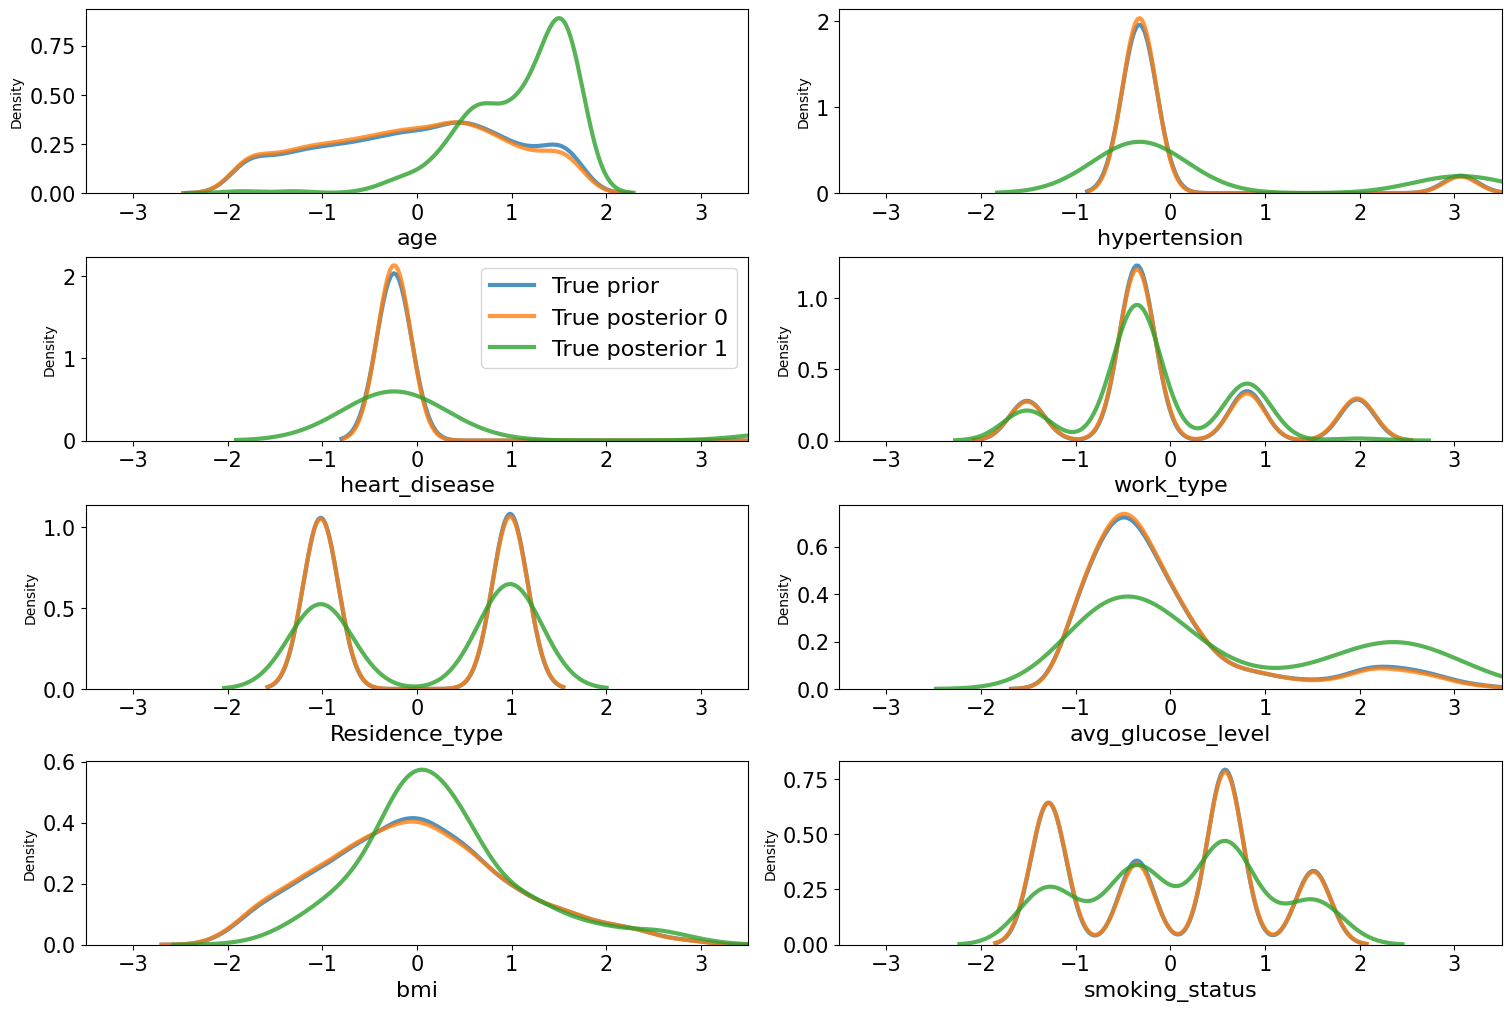

In [ ]:
# Set up the plot layout
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Define the indices of the attributes to be plotted
selected_predictor_columns = predictor_columns

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[dataset_df['target'] == 0], x=col_name, ax=axes[row, col], label='True posterior 0', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[dataset_df['target'] == 1], x=col_name, ax=axes[row, col], label='True posterior 1', linewidth=3, alpha=0.8)

    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Add vertical lines at the mean of each attribute
    #axes[row, col].axvline(predictor_info[i]['mean'], linestyle='--', color='black', label='Mean')
    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

#plt.suptitle('KDE Plots of Predictor Attributes (Normalized)', fontsize=20)
plt.show()

In [ ]:
# Set up the plot layout

prior_KLDs = []

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):


    # Plot uniform prior distribution
    true_prior_x = predictor_info[i]['pdf'](x)

    KLD_value = entropy(true_prior_x, uniform_prior_x)
    prior_KLDs.append(KLD_value)

prior_KLDs = np.array(prior_KLDs)

In [ ]:
# Get the indices that would sort the KLD values in descending order
prior_KLDs_sorted_indices = np.argsort(prior_KLDs)

# Display the indices order associated with descending order of KLD values
print("Indices order associated with descending order of KLD values:")
print(prior_KLDs_sorted_indices)

Indices order associated with descending order of KLD values:
[6 0 5 7 3 4 1 2]


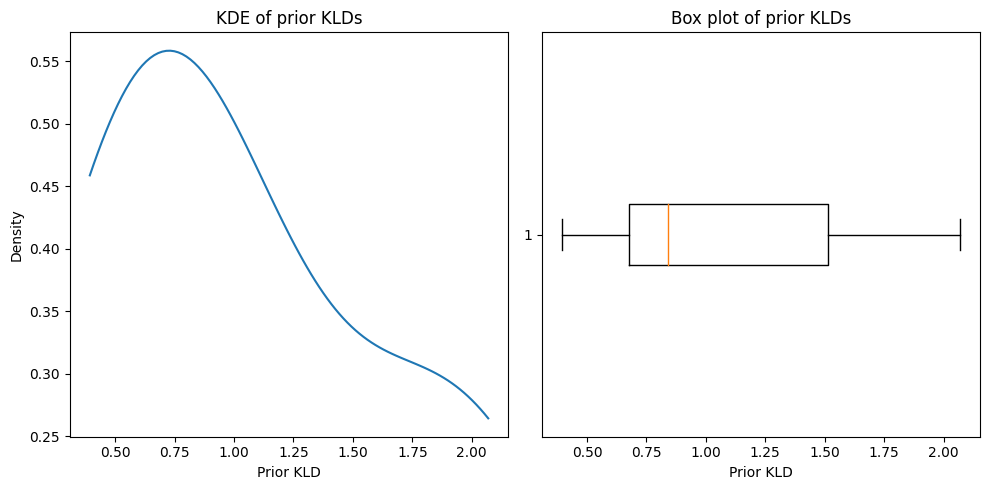

In [ ]:
# Create a figure with subplots for KDE and box plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot KDE of prior KLDs
kde = gaussian_kde(prior_KLDs)
y = np.linspace(min(prior_KLDs), max(prior_KLDs), 100)
ax1.plot(y, kde(y))
ax1.set_xlabel('Prior KLD')
ax1.set_ylabel('Density')
ax1.set_title('KDE of prior KLDs')

# Plot box plot of prior KLDs
ax2.boxplot(prior_KLDs, vert=False)
ax2.set_xlabel('Prior KLD')
ax2.set_title('Box plot of prior KLDs')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy, gaussian_kde


def proposal_within_range(current_params, scale):
    proposed_params = current_params + np.random.normal(0, scale, len(current_params))

    while not np.all(np.logical_and(-3 <= proposed_params, proposed_params <= 3)):
        idx_outside_range = np.where(np.logical_or(proposed_params < -3, proposed_params > 3))[0]
        proposed_params[idx_outside_range] = current_params[idx_outside_range] + np.random.normal(0, scale, len(idx_outside_range))

    return proposed_params



# Log Prior distribution
def log_uniform_prior(params):
    log_joint_probability = 0

    for i, param in enumerate(params):
        log_joint_probability += np.log(1/6)

    return log_joint_probability



# Likelihood function
def log_likelihood(params, data):
    feature_values = {col_name: [value] for col_name, value in zip(column_index_map.values(), params)}
    X_new = pd.DataFrame(feature_values)

    if data == 1:
        return np.log(ml.predict_proba(X_new)[0, 1])
    else:
        return np.log(1 - ml.predict_proba(X_new)[0, 1])



# Metropolis-Hastings MCMC algorithm
def metropolis_hastings(num_samples, initial_params, data):
    np.random.seed(42)

    current_params = initial_params
    accepted_params = [[] for _ in range(len(initial_params))]

    current_log_posterior = log_uniform_prior(current_params) + log_likelihood(current_params, data)

    iter = 0
    num_accepted = 0

    while num_accepted < num_samples:
        # Generate proposed params until likelihood >= 0.8
        proposed_params = np.zeros_like(current_params)
        proposed_likelihood = -np.inf

        iter = iter + 1

        num_proposing = 0
        while proposed_likelihood < np.log(0.5):
            num_proposing = num_proposing + 1
            proposed_params = proposal_within_range(current_params, 1)
            proposed_likelihood = log_likelihood(proposed_params, data)

        # Calculate acceptance probability
        proposed_log_posterior = log_uniform_prior(proposed_params) + proposed_likelihood
        acceptance_probability = np.exp(proposed_log_posterior - current_log_posterior)


        # Accept or reject the proposed parameter
        if np.random.rand() < acceptance_probability:
            num_accepted = num_accepted + 1

            if num_accepted % 1000 == 0:
                print("Num samples accepted: ", num_accepted)

            current_params = proposed_params
            current_log_posterior = proposed_log_posterior
            for i, param in enumerate(current_params):
                accepted_params[i].append(param)

    return accepted_params

In [ ]:
# Configuration settings for running MCMC and saving samples

run_MCMC = True
save_samples = True

data_shifts = [0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1]

samples_0_file_name = 'stroke_dnn_class_0_samples.pickle'
samples_1_file_name = 'stroke_dnn_class_1_samples.pickle'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

class0_samples = []
class1_samples = []

original_training_accuracies = []
original_test_accuracies = []

for shift in data_shifts:

    print('\n\n\nInverse estimation for data with shift ', shift)

    # Shift every value in the DataFrame to the right
    #X_train_shifted = X_train.add(shift)
    X_train_shifted = X_train.copy(deep=True)
    X_train_shifted["age"] = X_train_shifted["age"] + shift
    X_train_shifted["avg_glucose_level"] = X_train_shifted["avg_glucose_level"] + shift
    X_train_shifted["bmi"] = X_train_shifted["bmi"] + shift

    # Resample the training set using RandomOverSampler to address class imbalance
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_shifted, y_train)



    print('\nModel evaluation on training set:')

    # Initialize Random Forest classifier

    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_train, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    original_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)



    print('\nModel evaluation on test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    original_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    if run_MCMC:

        # Run MCMC
        num_samples = 5000
        initial_params = np.zeros(num_predictor_columns)

        print('\nMCMC for class 0')
        accepted_params_zero = metropolis_hastings(num_samples, initial_params, 0)
        class0_samples.append(accepted_params_zero)

        print('\nMCMC for class 1')
        accepted_params_one = metropolis_hastings(num_samples, initial_params, 1)
        class1_samples.append(accepted_params_one)

if save_samples:

    # Save the list to a file
    with open(samples_0_file_name, 'wb') as f:
        pickle.dump(class0_samples, f)

    files.download(samples_0_file_name)

    # Save the list to a file
    with open(samples_1_file_name, 'wb') as f:
        pickle.dump(class1_samples, f)

    files.download(samples_1_file_name)

if ~ run_MCMC:
    # Load the list from the file
    with open(samples_0_file_name, 'rb') as f:
        class0_samples = pickle.load(f)

    with open(samples_1_file_name, 'rb') as f:
        class1_samples = pickle.load(f)

original_training_accuracies = np.array(original_training_accuracies)
original_test_accuracies = np.array(original_test_accuracies)





Inverse estimation for data with shift  0

Model evaluation on training set:
Confusion Matrix:
[[4190   75]
 [   1  216]]
Precision: 0.7422680412371134
Recall: 0.9953917050691244
AUC ROC: 0.9978141663200091
Cohen Kappa Score: 0.8416079145823278
Accuracy: 0.9830432842481035
Geometric Mean Score: 0.9888820696979678

Model evaluation on test set:
Confusion Matrix:
[[448  20]
 [ 26   5]]
Precision: 0.2
Recall: 0.16129032258064516
AUC ROC: 0.7907361455748553
Cohen Kappa Score: 0.1303326513601576
Accuracy: 0.9078156312625251
Geometric Mean Score: 0.39293456675687427

MCMC for class 0
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000

MCMC for class 1
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000



Inverse estimation for data with shift  -0.1

Model evaluation on training set:
Confusion Matrix:
[[3991  274]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
accepted_params_zero = class0_samples[0]
accepted_params_one = class1_samples[0]

In [ ]:
# Define the est_posterior function with list comprehension
def est_posterior(a, prob, bins):
    return np.array([prob[np.digitize(val, bins) - 1] if (val > np.min(bins)) and (val < np.max(bins) and (prob[np.digitize(val, bins) - 1] != 0)) else 1e-9 for val in a])

In [ ]:
avg_posterior_KLDs = []


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    prob, bins = np.histogram(accepted_params_one[i], bins=100, density=True)
    est_post1 = est_posterior(x, prob, bins)


     # Posterior histogram
    prob, bins = np.histogram(accepted_params_zero[i], bins=100, density=True)
    est_post0 = est_posterior(x, prob, bins)


     # Prior distribution
    true_posterior1_x = predictor_info[i]['pdf1'](x)

    # Prior distribution
    true_posterior0_x = predictor_info[i]['pdf0'](x)

    avg_KLD_value = 0.5*entropy(true_posterior0_x, est_post0) + 0.5*entropy(true_posterior1_x, est_post1)
    avg_posterior_KLDs.append(avg_KLD_value)


avg_posterior_KLDs = np.array(avg_posterior_KLDs)

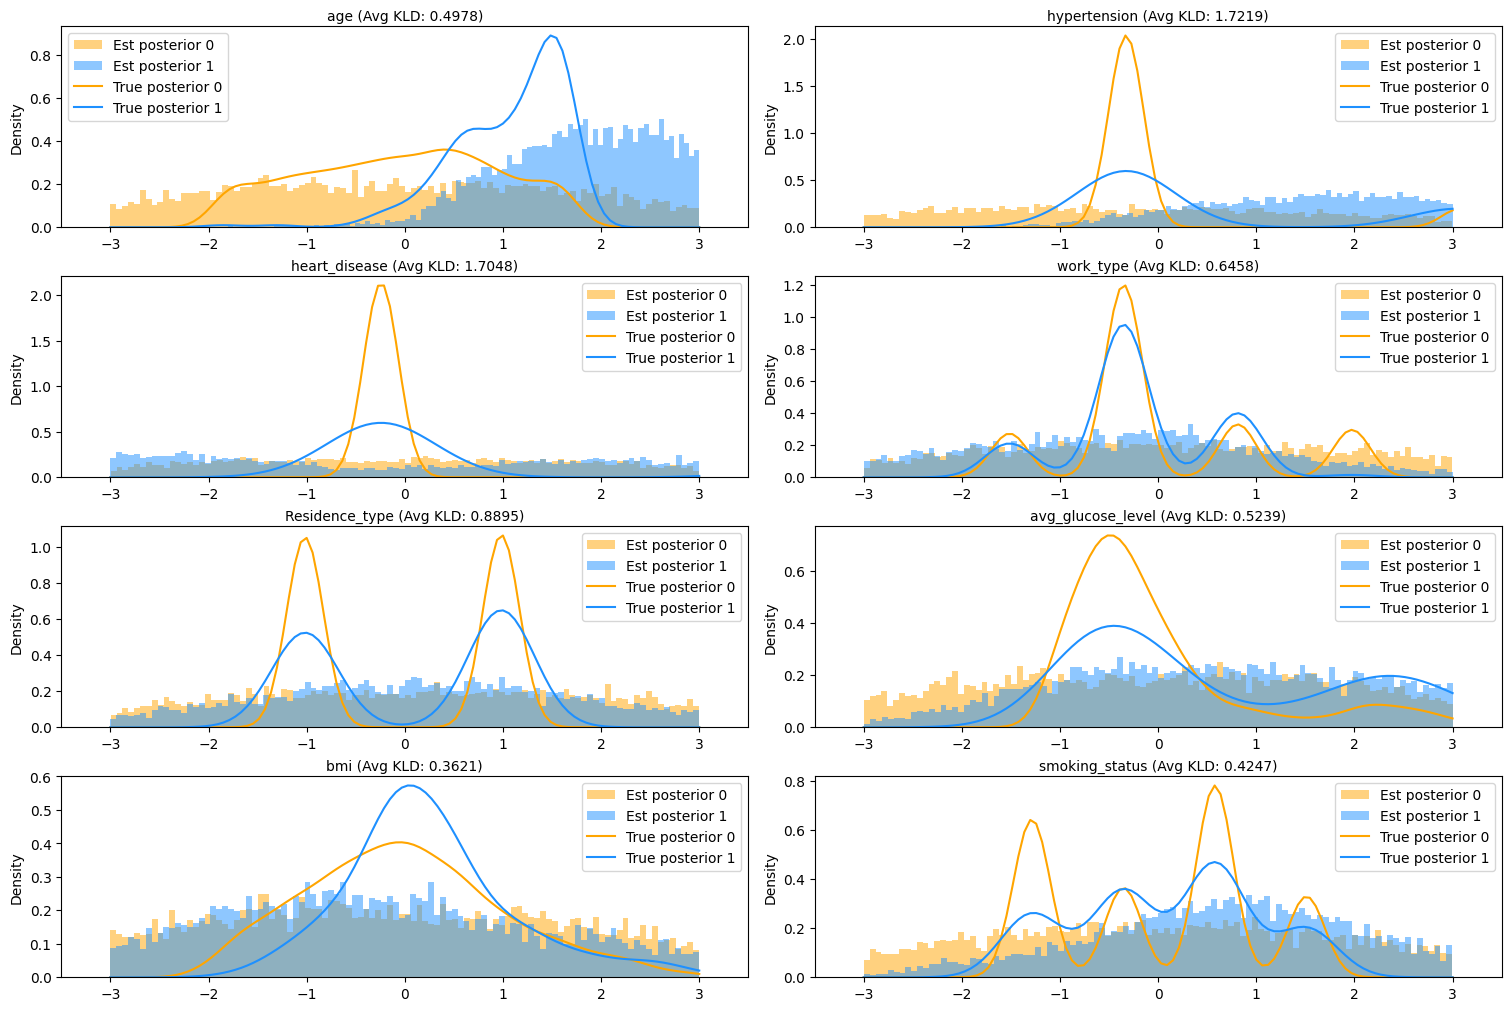

In [ ]:
# Set up the plot layout
nrows = 4
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

attribute_indices = [0, 1, 2, 3, 4, 5, 6, 7]

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    post0, bins0, _ = axes[row, col].hist(accepted_params_zero[attribute_indices[i]], bins=100, density=True, alpha=0.5, label='Est posterior 0', color='orange')
    post1, bins1, _ = axes[row, col].hist(accepted_params_one[attribute_indices[i]], bins=100, density=True, alpha=0.5, label='Est posterior 1', color='dodgerblue')

    # Prior distribution
    posterior0_x = predictor_info[attribute_indices[i]]['pdf0'](x)
    axes[row, col].plot(x, posterior0_x, label='True posterior 0', color='orange')

     # Prior distribution
    posterior1_x = predictor_info[attribute_indices[i]]['pdf1'](x)
    axes[row, col].plot(x, posterior1_x, label='True posterior 1', color='dodgerblue')

    axes[row, col].xaxis.set_label_position('top')
    axes[row, col].set_xlim(-3.5, 3.5)
    axes[row, col].set_xlabel(f'{col_name} (Avg KLD: {avg_posterior_KLDs[attribute_indices[i]]:.4f})')
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()

plt.show()

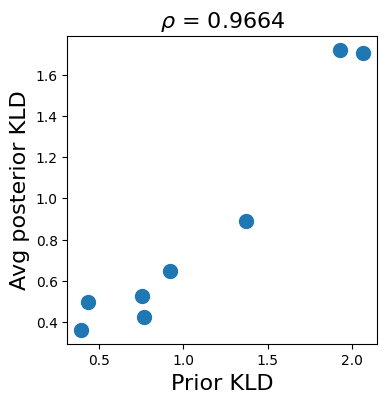

In [ ]:
avg_post_KLDs_all_params = []

for i, shift in enumerate(data_shifts):

    #print('\n\n\nPrior JSD vs  Avg posterior KLD for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)


    avg_posterior_KLDs = []


    # Plot the KDEs for each attribute and class
    for j, col_name in enumerate(predictor_columns):
        row = j // ncols
        col = j % ncols

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_one[j], bins=100, density=True)
        est_post1 = est_posterior(x, prob, bins)


        # Posterior histogram
        prob, bins = np.histogram(accepted_params_zero[j], bins=100, density=True)
        est_post0 = est_posterior(x, prob, bins)


        # Prior distribution
        true_posterior1_x = predictor_info[j]['pdf1'](x)

        # Prior distribution
        true_posterior0_x = predictor_info[j]['pdf0'](x)

        avg_KLD_value = 0.5*entropy(true_posterior0_x, est_post0) + 0.5*entropy(true_posterior1_x, est_post1)
        avg_posterior_KLDs.append(avg_KLD_value)


    avg_posterior_KLDs = np.array(avg_posterior_KLDs)
    avg_post_KLDs_all_params.append(np.mean(avg_posterior_KLDs))


    if shift==0:
        plt.figure(figsize=(4, 4))

        # Create a scatter plot of the two sets of importance values
        plt.scatter(prior_KLDs, avg_posterior_KLDs, s=100)


        # Calculate the correlation coefficient between the two sets of importance values
        correlation_coefficient = np.corrcoef(prior_KLDs, avg_posterior_KLDs)[0, 1]

        # Set the axis labels and title
        plt.xlabel('Prior KLD', fontsize=16)
        plt.ylabel('Avg posterior KLD', fontsize=16)
        plt.title('$\\rho$ = {:.4f}'.format(correlation_coefficient), fontsize=16)

        # Display the plot
        plt.show()

avg_post_KLDs_all_params = np.array(avg_post_KLDs_all_params)


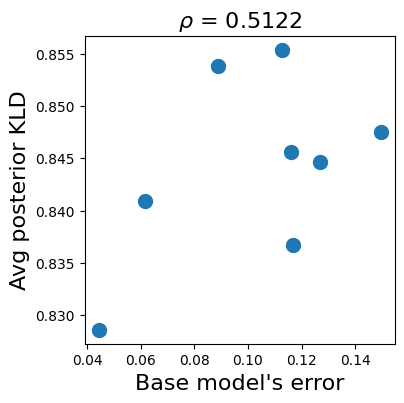

In [ ]:
plt.figure(figsize=(4, 4))

temp_kld = np.delete(avg_post_KLDs_all_params[1:],8)
temp_acc = np.delete(original_training_accuracies[1:],8)

temp_kld = np.delete(temp_kld,2)
temp_acc = np.delete(temp_acc,2)

# Create a scatter plot of the two sets of importance values
plt.scatter(1-temp_acc, temp_kld, s=100)

# Calculate the correlation coefficient between the two sets of importance values
training_correlation_coefficient = np.corrcoef(1-temp_acc, temp_kld)[0, 1]

# Set the axis labels and title
plt.xlabel('Base model\'s error', fontsize=16)
plt.ylabel('Avg posterior KLD', fontsize=16)
plt.title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Display the plot
plt.show()


In [ ]:
synthetic_training_accuracies = []
synthetic_test_accuracies = []

for i, shift in enumerate(data_shifts):

    print('\n\n\nSynthetic models for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)

    # Concatenate accepted_params_one and accepted_params_zero along the rows axis
    simulated_dataset = np.concatenate((accepted_params_one, accepted_params_zero), axis=1)

    # Transpose the dataset to have 2000 records and 15 predictor attributes
    simulated_dataset = simulated_dataset.T

    # Create an array of class labels (1 for class 1 and 0 for class 0)
    class_labels = np.concatenate((np.ones(accepted_params_one.shape[1]), np.zeros(accepted_params_zero.shape[1])))

    # Add the class labels as the 16th attribute
    simulated_dataset = np.column_stack((simulated_dataset, class_labels))

    data_columns = [col for col in dataset_df.columns]

    # Convert binary_dataset to a DataFrame
    simulated_dataset_df = pd.DataFrame(simulated_dataset)

    # Rename the columns of simulated_dataset_df to match dataset_df
    simulated_dataset_df.columns = dataset_df.columns

    # Check the first few rows of simulated_dataset_df
    simulated_dataset_df

    # Separate target variable from features
    sim_train_y = simulated_dataset_df["target"]
    sim_train_X = simulated_dataset_df.drop("target", axis=1)

    print('\nSynthetic model evaluation on original training set:')

    # Initialize Random Forest classifier
    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(sim_train_X, sim_train_y)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_train, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    synthetic_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    print('\nSynthetic model evaluation on original test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    synthetic_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


synthetic_training_accuracies = np.array(synthetic_training_accuracies)
synthetic_test_accuracies = np.array(synthetic_test_accuracies)




Synthetic models for data with shift  0

Synthetic model evaluation on original training set:
Confusion Matrix:
[[3798  467]
 [ 101  116]]
Precision: 0.19897084048027444
Recall: 0.5345622119815668
AUC ROC: 0.8487312332186212
Cohen Kappa Score: 0.23609409892281585
Accuracy: 0.8732708612226685
Geometric Mean Score: 0.6899491598420159

Synthetic model evaluation on original test set:
Confusion Matrix:
[[422  46]
 [ 18  13]]
Precision: 0.22033898305084745
Recall: 0.41935483870967744
AUC ROC: 0.7973531844499586
Cohen Kappa Score: 0.2258314748375837
Accuracy: 0.8717434869739479
Geometric Mean Score: 0.6149278012229126



Synthetic models for data with shift  -0.1

Synthetic model evaluation on original training set:
Confusion Matrix:
[[3702  563]
 [  81  136]]
Precision: 0.19456366237482117
Recall: 0.6267281105990783
AUC ROC: 0.8655523200847105
Cohen Kappa Score: 0.24084766865869955
Accuracy: 0.856314145470772
Geometric Mean Score: 0.7375615642534255

Synthetic model evaluation on origina

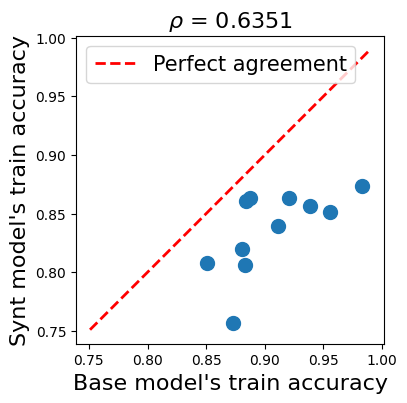

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the training accuracy values
ax.scatter(original_training_accuracies[:], synthetic_training_accuracies[:], s=100)

# Calculate the correlation coefficient between the training accuracy values
training_correlation_coefficient = np.corrcoef(original_training_accuracies[:], synthetic_training_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's train accuracy", fontsize=16)
ax.set_ylabel("Synt model's train accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red', label='Perfect agreement')


# Add a legend to the plot
ax.legend(fontsize=15)

# Display the plot
plt.show()

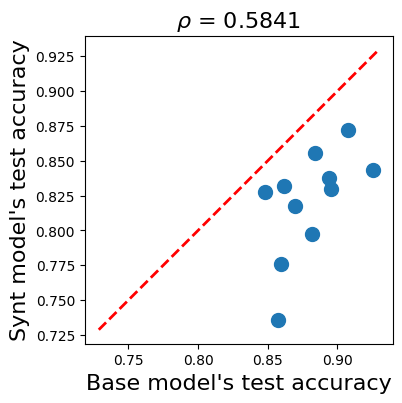

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the test accuracy values
ax.scatter(original_test_accuracies[:], synthetic_test_accuracies[:], s=100)

# Calculate the correlation coefficient between the test accuracy values
test_correlation_coefficient = np.corrcoef(original_test_accuracies[:], synthetic_test_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's test accuracy", fontsize=16)
ax.set_ylabel("Synt model's test accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(test_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red')


# Display the plot
plt.show()